# Undersampling & Oversampling

Undersampling aims to decrease the number of instances from the overrepresented class in a data set, they are said to be unbalanced. Unbalanced refers to highly unequal or uneven distribution of classes. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from imblearn.over_sampling import SMOTE #Using nearest neighbors algorithm to generate new and synthetic data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing random forest module

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from preprocessing_ml import *

Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module


In [2]:
###Importing the data
dataframe = pd.read_csv("framingham.csv")

In [3]:
###Seeing the difference between CHD after 10 years and no-CHD.

CHD_count = dataframe.TenYearCHD.value_counts() #Shows the count of no-CHD and CHD after 10 y
print('The CHD after ten years has a ratio of approximately {} to 1.'.format(int(CHD_count[0] / CHD_count[1])))

The CHD after ten years has a ratio of approximately 5 to 1.


In [4]:
def preprocessing(dataframe, features, n):
    dataframe = chose_features(dataframe, features = features, n_features = n, vv = 1)
    dataframe = drop_missing(dataframe, v = 1)
    return dataframe

features = ['sysBP', 'age', 'cigsPerDay', 'totChol', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male', 'BMI', 'TenYearCHD']
dataframe = preprocessing(dataframe, features, -1)

#dataframe = preprocessing(dataframe, 12)
#dataframe = dataframe.drop(['glucose'], axis=1);

Now selecting chosen features....
	 * Chosen features:  ['sysBP', 'age', 'cigsPerDay', 'totChol', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male', 'BMI', 'TenYearCHD']
	 * Dropped features:  ['education', 'currentSmoker', 'prevalentStroke', 'heartRate', 'glucose']
Now dropping rows with missing values....
	 * Dropped 149 rows 3.5%. 4091 rows remaining



In [5]:
def scores(name, y_test, pred, v):
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    if v == 'y':
        print("The accuracy score for {} is: {}%.".format(name, round(accuracy, 3) * 100))
        print("The f1 score for {} is: {}%.".format(name, round(f1, 3) * 100))
        print("The precision score for {} is: {}%.".format(name, round(precision, 3) * 100))
        print("The recall score for {} is: {}%.".format(name, round(recall, 3) * 100))        
        return(accuracy, f1, precision, recall)
    elif v == 'n':
        return(accuracy, f1, precision, recall)
    else:
        print("Error: please choose 'y' or 'n'.")

In [6]:
def confusion(dataframe, name):
    sns.heatmap(pd.DataFrame(dataframe), annot=True , fmt='g')
    plt.title('Confusion matrix {}\n'.format(name), y=1.1)

In [7]:
def model(classifier, name, X_train, X_test, y_train, y_test, v):
    classifier.fit(X_train, y_train)
    classifier_pred = classifier.predict(X_test)
    score = scores(name, y_test, classifier_pred, v)

    accuracy = score[0]
    f1 = score[1]
    precision = score[2]
    recall = score[3]
    
    confusion(confusion_matrix(y_test, classifier_pred), name)

    return(accuracy, f1, precision, recall)

In [8]:
def oversample(dataframe, ratio):
    X_train, X_test, y_train, y_test = split_data(dataframe, dep_var='TenYearCHD', test_size = 0.2, v = 1, r_state = 0)
    sm = SMOTE(random_state = 0, ratio = ratio)
    X_train, y_train = sm.fit_sample(X_train, y_train)
    model(RandomForestClassifier(n_estimators=120, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

In [9]:
def no_resample(dataframe):
    X_train, X_test, y_train, y_test = split_data(dataframe, dep_var='TenYearCHD', test_size = 0.2, v = 1, r_state = 0)
    model(RandomForestClassifier(n_estimators=120, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

In [10]:
def undersample(dataframe, ratio):
    dataframe = dataframe.sample(frac=1,random_state=1)
    
    CHD_count = dataframe.TenYearCHD.value_counts()

    CHD_data = dataframe.loc[dataframe['TenYearCHD'] == 1]
    non_CHD_data = dataframe.loc[dataframe['TenYearCHD'] == 0].sample(n = (CHD_count[1]), random_state = 1)
    
    dataframe = pd.concat([CHD_data, non_CHD_data])
    
    CHD_count = dataframe.TenYearCHD.value_counts() #Shows the count of no-CHD and CHD after 10 y
    print('The CHD after ten years has a ratio of approximately {} to 1.'.format(int(CHD_count[0] / CHD_count[1])))
    
    X_train, X_test, y_train, y_test = split_data(dataframe, dep_var='TenYearCHD', test_size = 0.2, v = 1, r_state = 0)
    model(RandomForestClassifier(n_estimators=120, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

In [ ]:
no_resample(dataframe)

In [ ]:
oversample(dataframe, 1)

In [ ]:
undersample(dataframe, 1)

In [15]:
def model_new(classifier, name, X_train, X_test, y_train, y_test, v):
    classifier.fit(X_train, y_train)
    classifier_pred = classifier.predict(X_test)

    
    predictions = classifier.predict_proba(X_test)
    predicted = (predictions[:,1] >= 0.5).astype('int')

    score = scores(name, y_test, predicted, v)
    
    accuracy = score[0]
    f1 = score[1]
    precision = score[2]
    recall = score[3]
    
    confusion(confusion_matrix(y_test, predicted), name)

    return(accuracy, f1, precision, recall)

In [16]:
def resample(dataset, r_state=0, ratio_1_to_0=1.0, test_size=0.2, v=0):
    '''Resample dataset by upsampling, increasing number of minority samples using SMOTE, a package that creates synthetic values when upsampling
    - dataset: Pandas Dataframe. Data to upsample
    - r_state (optional): int. Random state to use
    - ratio_1_to_0 (optional): float. Ratio to resample to.
    - v (optional): Verbose
    Returns X_train, x_test, Y_train, y_test
    '''
    from imblearn.over_sampling import SMOTE  # Using nearest neighbors algorithm to generate new and synthetic data
    import pandas as pd

    # Splitting into test and train
    train_data = dataset.sample(frac=(1 - test_size), random_state=r_state)
    test_data = pd.concat([train_data, dataset]).drop_duplicates(keep=False)

    # Splitting into majority and minority classes
    X_train = train_data.drop('TenYearCHD', axis=1)
    y_train = train_data[['TenYearCHD']]
    X_test = test_data.drop('TenYearCHD', axis=1)
    y_test = test_data[['TenYearCHD']]
    
    sm = SMOTE(random_state=r_state, ratio=ratio_1_to_0)

    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)
    y_train_res = pd.DataFrame(y_train_res, columns=y_train.columns)

    if v == 1:
        print("\nUpsampling data using SMOTE")
        print('Splitting data set into training and test sets....')
        print("The ratio of train data to test data is {}:1\n".format((train_data.shape[0]) / (dataset.shape[0])))
        print("The original ratio of CHD to non-CHD was: {}: 1".format(dataset.TenYearCHD.value_counts()[0]/dataset.TenYearCHD.value_counts()[1]))
        print("The new ratio of CHD to non-CHD is: {}: 1".format(X_train_res.shape[0]/y_train_res.shape[0]))

    return X_train_res, X_test, y_train_res, y_test

In [17]:
def new_2(dataframe):
    data = smote(dataframe, v = 1)
    
    X_train = data[0]
    X_test = data[1]
    y_train = data[2]
    y_test = data[3]
    
    model_new(RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  



Upsampling data using SMOTE
Splitting data set into training and test sets....
The ratio of train data to test data is 0.8000488878024933:1

The original ratio of CHD to non-CHD was: 5.684640522875817: 1
The new ratio of CHD to non-CHD is: 1.0: 1
The accuracy score for Random Forest is: 81.8%.
The f1 score for Random Forest is: 24.4%.
The precision score for Random Forest is: 32.9%.
The recall score for Random Forest is: 19.400000000000002%.


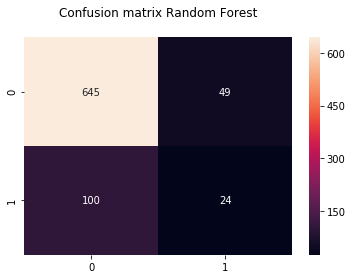

In [18]:
new_2(dataframe)

In [ ]:
dataframe.head()
print(dataframe.shape)

new = dataframe.sample(frac = 0.8, random_state = 0)
print(new.shape)
new_small = pd.concat([new, dataframe]).drop_duplicates(keep=False)
print(new_small.shape)

print((new.shape[0]) / (dataframe.shape[0]))

